In [18]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import coo_matrix, hstack
from sklearn.linear_model import Ridge


# Some actions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math
import matplotlib.pyplot as plt

1) Загрузите данные об описаниях вакансий и соответствующих годовых зарплатах из файла salary-train.csv (либо его заархивированную версию salary-train.zip).

In [5]:
data_test = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_4/salary-test-mini.csv')
data_test.head()

data_train = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_4/salary-train.csv')
data_train.head()

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,International Sales Manager London ****k ****...,London,permanent,33000
1,An ideal opportunity for an individual that ha...,London,permanent,50000
2,Online Content and Brand Manager// Luxury Reta...,South East London,permanent,40000
3,A great local marketleader is seeking a perman...,Dereham,permanent,22500
4,Registered Nurse / RGN Nursing Home for Young...,Sutton Coldfield,NaN,20355


2) Проведите предобработку:
- Приведите тексты к нижнему регистру (text.lower()).
- Замените все, кроме букв и цифр, на пробелы — это облегчит дальнейшее разделение текста на слова. Для такой замены в строке text подходит следующий вызов: re.sub('[^a-zA-Z0-9]', ' ', text). Также можно воспользоваться методом replace у DataFrame, чтобы сразу преобразовать все тексты
- Примените TfidfVectorizer для преобразования текстов в векторы признаков. Оставьте только те слова, которые встречаются хотя бы в 5 объектах (параметр min_df у TfidfVectorizer).
- Замените пропуски в столбцах LocationNormalized и ContractTime на специальную строку 'nan'. Код для этого был приведен выше.
- Примените DictVectorizer для получения one-hot-кодирования признаков LocationNormalized и ContractTime.
- Объедините все полученные признаки в одну матрицу "объекты-признаки". Обратите внимание, что матрицы для текстов и категориальных признаков являются разреженными. Для объединения их столбцов нужно воспользоваться функцией scipy.sparse.hstack.

In [13]:
# Обучающая выборка
data_train['FullDescription'] = data_train['FullDescription'].str.lower()
data_train['FullDescription'] = data_train['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
data_train['LocationNormalized'].fillna('nan', inplace=True)
data_train['ContractTime'].fillna('nan', inplace=True)

#Тестовая выборка
data_test['FullDescription'] = data_test['FullDescription'].str.lower()
data_test['FullDescription'] = data_test['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
data_test['LocationNormalized'].fillna('nan', inplace=True)
data_test['ContractTime'].fillna('nan', inplace=True)

# Обучение
vectorizer = TfidfVectorizer(min_df = 5)
vectorizer1 = DictVectorizer()
X = vectorizer.fit_transform(data_train['FullDescription'])
X_train = vectorizer1.fit_transform(data_train[['LocationNormalized', 'ContractTime']].to_dict('records'))
X = hstack([X,X_train])

# Тест
Y = vectorizer.transform(data_test['FullDescription'])
Y_test = vectorizer1.transform(data_test[['LocationNormalized', 'ContractTime']].to_dict('records'))
Y = hstack([Y,Y_test])

3) Обучите гребневую регрессию с параметрами alpha=1 и random_state=241. Целевая переменная записана в столбце SalaryNormalized.

In [15]:
# Обучение линейной регрессии
clf = Ridge(alpha=1.0,random_state=241)
clf.fit(X, data_train['SalaryNormalized'])
s = clf.get_params()
clf.set_params(**s)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=241, solver='auto', tol=0.001)

4) Постройте прогнозы для двух примеров из файла salary-test-mini.csv. Значения полученных прогнозов являются ответом на задание. Укажите их через пробел.

In [16]:
clf.predict(Y)

array([56555.61500155, 37188.32442618])

Чему равны прогнозы для двух примеров? Укажите ответы через пробел. 56555.62 37188.32

0.01
0.08
0.2
0.4
0.9
1
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2
4
7
10


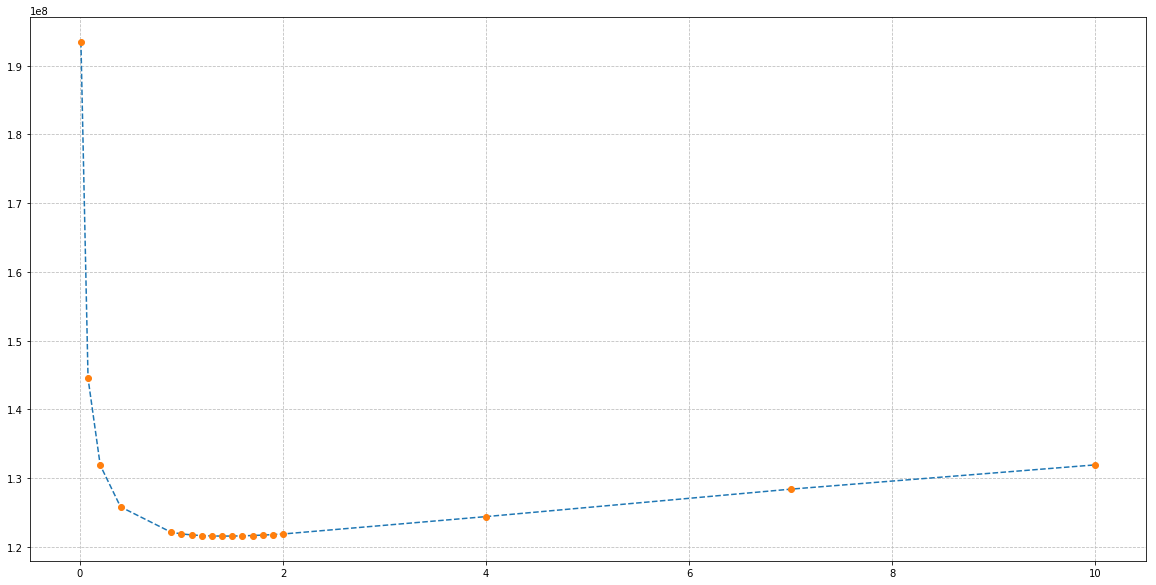

In [20]:
# Обучающая выборка
data_train = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_4/salary-train.csv')
data_train['FullDescription'] = data_train['FullDescription'].str.lower()
data_train['FullDescription'] = data_train['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
data_train['LocationNormalized'].fillna('nan', inplace=True)
data_train['ContractTime'].fillna('nan', inplace=True)

#Тестовая выборка
data_test = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_4/salary-test-mini.csv')
data_test['FullDescription'] = data_test['FullDescription'].str.lower()
data_test['FullDescription'] = data_test['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
data_test['LocationNormalized'].fillna('nan', inplace=True)
data_test['ContractTime'].fillna('nan', inplace=True)

# Обучение
vectorizer = TfidfVectorizer(min_df = 5)
vectorizer1 = DictVectorizer()
X = vectorizer.fit_transform(data_train['FullDescription'])
X_train = vectorizer1.fit_transform(data_train[['LocationNormalized', 'ContractTime']].to_dict('records'))
X = hstack([X,X_train])

kf = KFold(n_splits=3, shuffle=True, random_state=1)
kf.split(X,data_train['SalaryNormalized'])

# Обучение линейной регрессии
a = pd.DataFrame()
index = 0
for i in (0.01,0.08,0.2, 0.4,0.9, 1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9, 2, 4, 7, 10):
    clf = Ridge(alpha=i,random_state=241)
    b = cross_val_score(clf, X, data_train['SalaryNormalized'], scoring = 'neg_mean_squared_error', cv = kf)
    a.loc[0, index] = math.fabs(b.mean())
    a.loc[1, index] = i
    index+=1
    print(i)
plt.figure(figsize = (20, 10))
plt.plot(a.loc[1,:],a.loc[0,:],'--')
plt.plot(a.loc[1,:],a.loc[0,:],'o')
plt.grid(True, linestyle='--', color='0.75')

In [23]:
min(a.loc[0,:])

121592362.25325657